# Loans: Get Tested, Know Your Status
## by D'Jreya Boyd

## Investigation Overview

> The goal of data investigation is to see what factors can affect the status of the loan status and loan original amount.

## Dataset Overview

> The original data is 113937 rows × 81 columns, however I focused on 17 columns. The separated data (loans2) consists of the same number of loans, however with only 15(Borrower APR, Borrower Rate, Loan Months Since Origination, Loan Status, Occupation, Employment Status, Employment Status Duration, Monthly Loan Payment , Loan Original Amount, Debt To Income Ratio, IncomeRange, Income Verifiable, Stated Monthly Income) variables. The majority of the variables are quantitative witha few qualitative such as loan status, occupation and income range.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [6]:
def mkcat(y,x):
    """Takes the column y and converts the type to any type x"""
    loans2_clean[y] = loans2_clean[y].astype(x)

In [8]:
#Clean data slightly to help focus on certain columns
loans2 = loans[['MemberKey','CreditGrade','LoanCurrentDaysDelinquent'\
                ,'BorrowerAPR','BorrowerRate','Term',\
                'LoanMonthsSinceOrigination','LoanStatus','Occupation',\
                'EmploymentStatus', 'EmploymentStatusDuration',\
                'MonthlyLoanPayment', 'LoanOriginalAmount',\
                'DebtToIncomeRatio','IncomeRange',\
                'IncomeVerifiable','StatedMonthlyIncome']]
loans2 = loans2[np.isfinite(loans2['EmploymentStatusDuration'])]
loans2_clean = loans2.copy()
mkcat('Term','category')
mkcat('LoanStatus','category')
mkcat('EmploymentStatus', 'category')

In [10]:
def infos(title,x,y):
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Status Frequency

> More than 75 % of the loans fall within the first 4 loan statuses. Very few (relative to the data set) are in bad standings with their loans. There are more current loans than completed loans, which is a good sign if the bank is interested in continually having an income from loans.

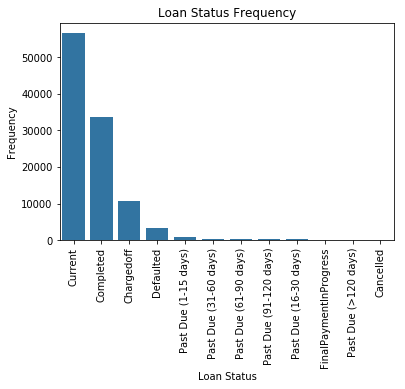

In [13]:
#Loan Status
base_color = sb.color_palette()[0]
status_order = loans2_clean.LoanStatus.value_counts().index
sb.countplot(data= loans2_clean, x = 'LoanStatus', color = base_color, order = status_order)
plt.xticks(rotation = 90)
infos('Loan Status Frequency','Loan Status','Frequency') ;

## Loan Status Frequency by Term

> The data was split by the status because most of the lendees fell within these 4 categories. Based on this graph we can see the most common Term is the 3 year option for those who are in good standings. 

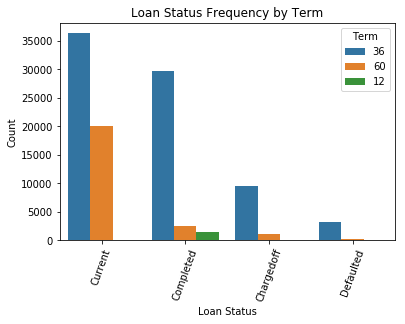

In [16]:
# Term to Loan Status (qual vs qual)
status_order = ['Current','Completed', 'Chargedoff', 'Defaulted']
loans2_clean.Term.cat.reorder_categories([36, 60, 12], inplace=True)
sb.countplot(data = loans2_clean, x = 'LoanStatus', hue = 'Term', order = status_order )
infos('Loan Status Frequency by Term','Loan Status', 'Count')
plt.xticks(rotation = 70);

## Loan Amoint vs Borrower Rate by Term

> From this graph it appears longer term loans with higher original amounts tend to have lower interest rates


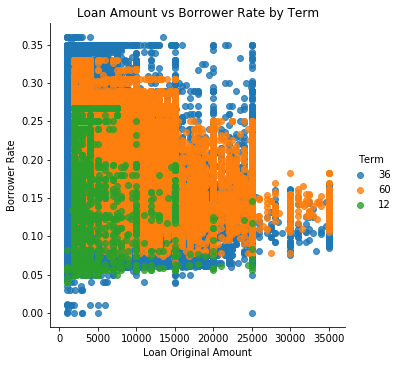

In [15]:
#Using color as the encoding for the third variable(Term)
sb.lmplot(x='LoanOriginalAmount', y='BorrowerRate', hue='Term', 
           data = loans2_clean.loc[loans2_clean['Term'].isin([36, 60 ,12])], 
           fit_reg=False)
infos('Loan Amount vs Borrower Rate by Term','Loan Original Amount', 'Borrower Rate');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!